# **UTS GANJIL KELOMPOK**
# **Object Detection For Banana Video Timelapse**

## **Kelompok PKI (Pisang Kematangan Image)**

Anggota Kelompok:
- Novriani Ambarita (202304560038)
- Alosia Wulandari Syah Pramesti (202304560025)
- Citra Amalia Lestari (202304560046)
- Jose Garcia Puglisi (202304560019)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/video_detection/

/content/drive/MyDrive/video_detection


In [ ]:
%ls /content/drive/MyDrive/video_detection/

In [ ]:
%mkdir video_objdet_banana
%cd video_objdet_banana

/content/drive/MyDrive/video_detection/video_objdet_banana


# 2. Check the GPU Runtime

In [ ]:
!nvidia-smi

Sat Oct 25 04:22:22 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P8             10W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# 3. Make "video_objdet_banana" dir as HOME

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/video_detection/video_objdet_banana


# 4. Installing Roboflow and Importing Dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="XTSrqZ9VYpH5qaSRT3Vg")
project = rf.workspace("unlimitedbladeworks").project("banana_video_detection-fjdac")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Banana_Video_Detection-1 in yolov8:: 100%|██████████| 878/878 [00:06<00:00, 129.83it/s]


# 5. Installing YOLO

In [ ]:
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 40.4/112.6 GB disk)


# 6. Model Training

In [ ]:
print(HOME)

/content/drive/MyDrive/video_detection/video_objdet_banana


In [ ]:
!ls "/content/drive/MyDrive/video_detection/video_objdet_banana/Banana_Video_Detection-1/"

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data="/content/drive/MyDrive/video_detection/video_objdet_banana/Banana_Video_Detection-1/data.yaml" epochs=25 imgsz=800 plots=True

/content/drive/MyDrive/video_detection/video_objdet_banana
100% 49.7M/49.7M [00:00<00:00, 106MB/s] 
New https://pypi.org/project/ultralytics/8.3.221 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/video_detection/video_objdet_banana/Banana_Video_Detection-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=Tr

# 7. Checking the Confusion Matrix

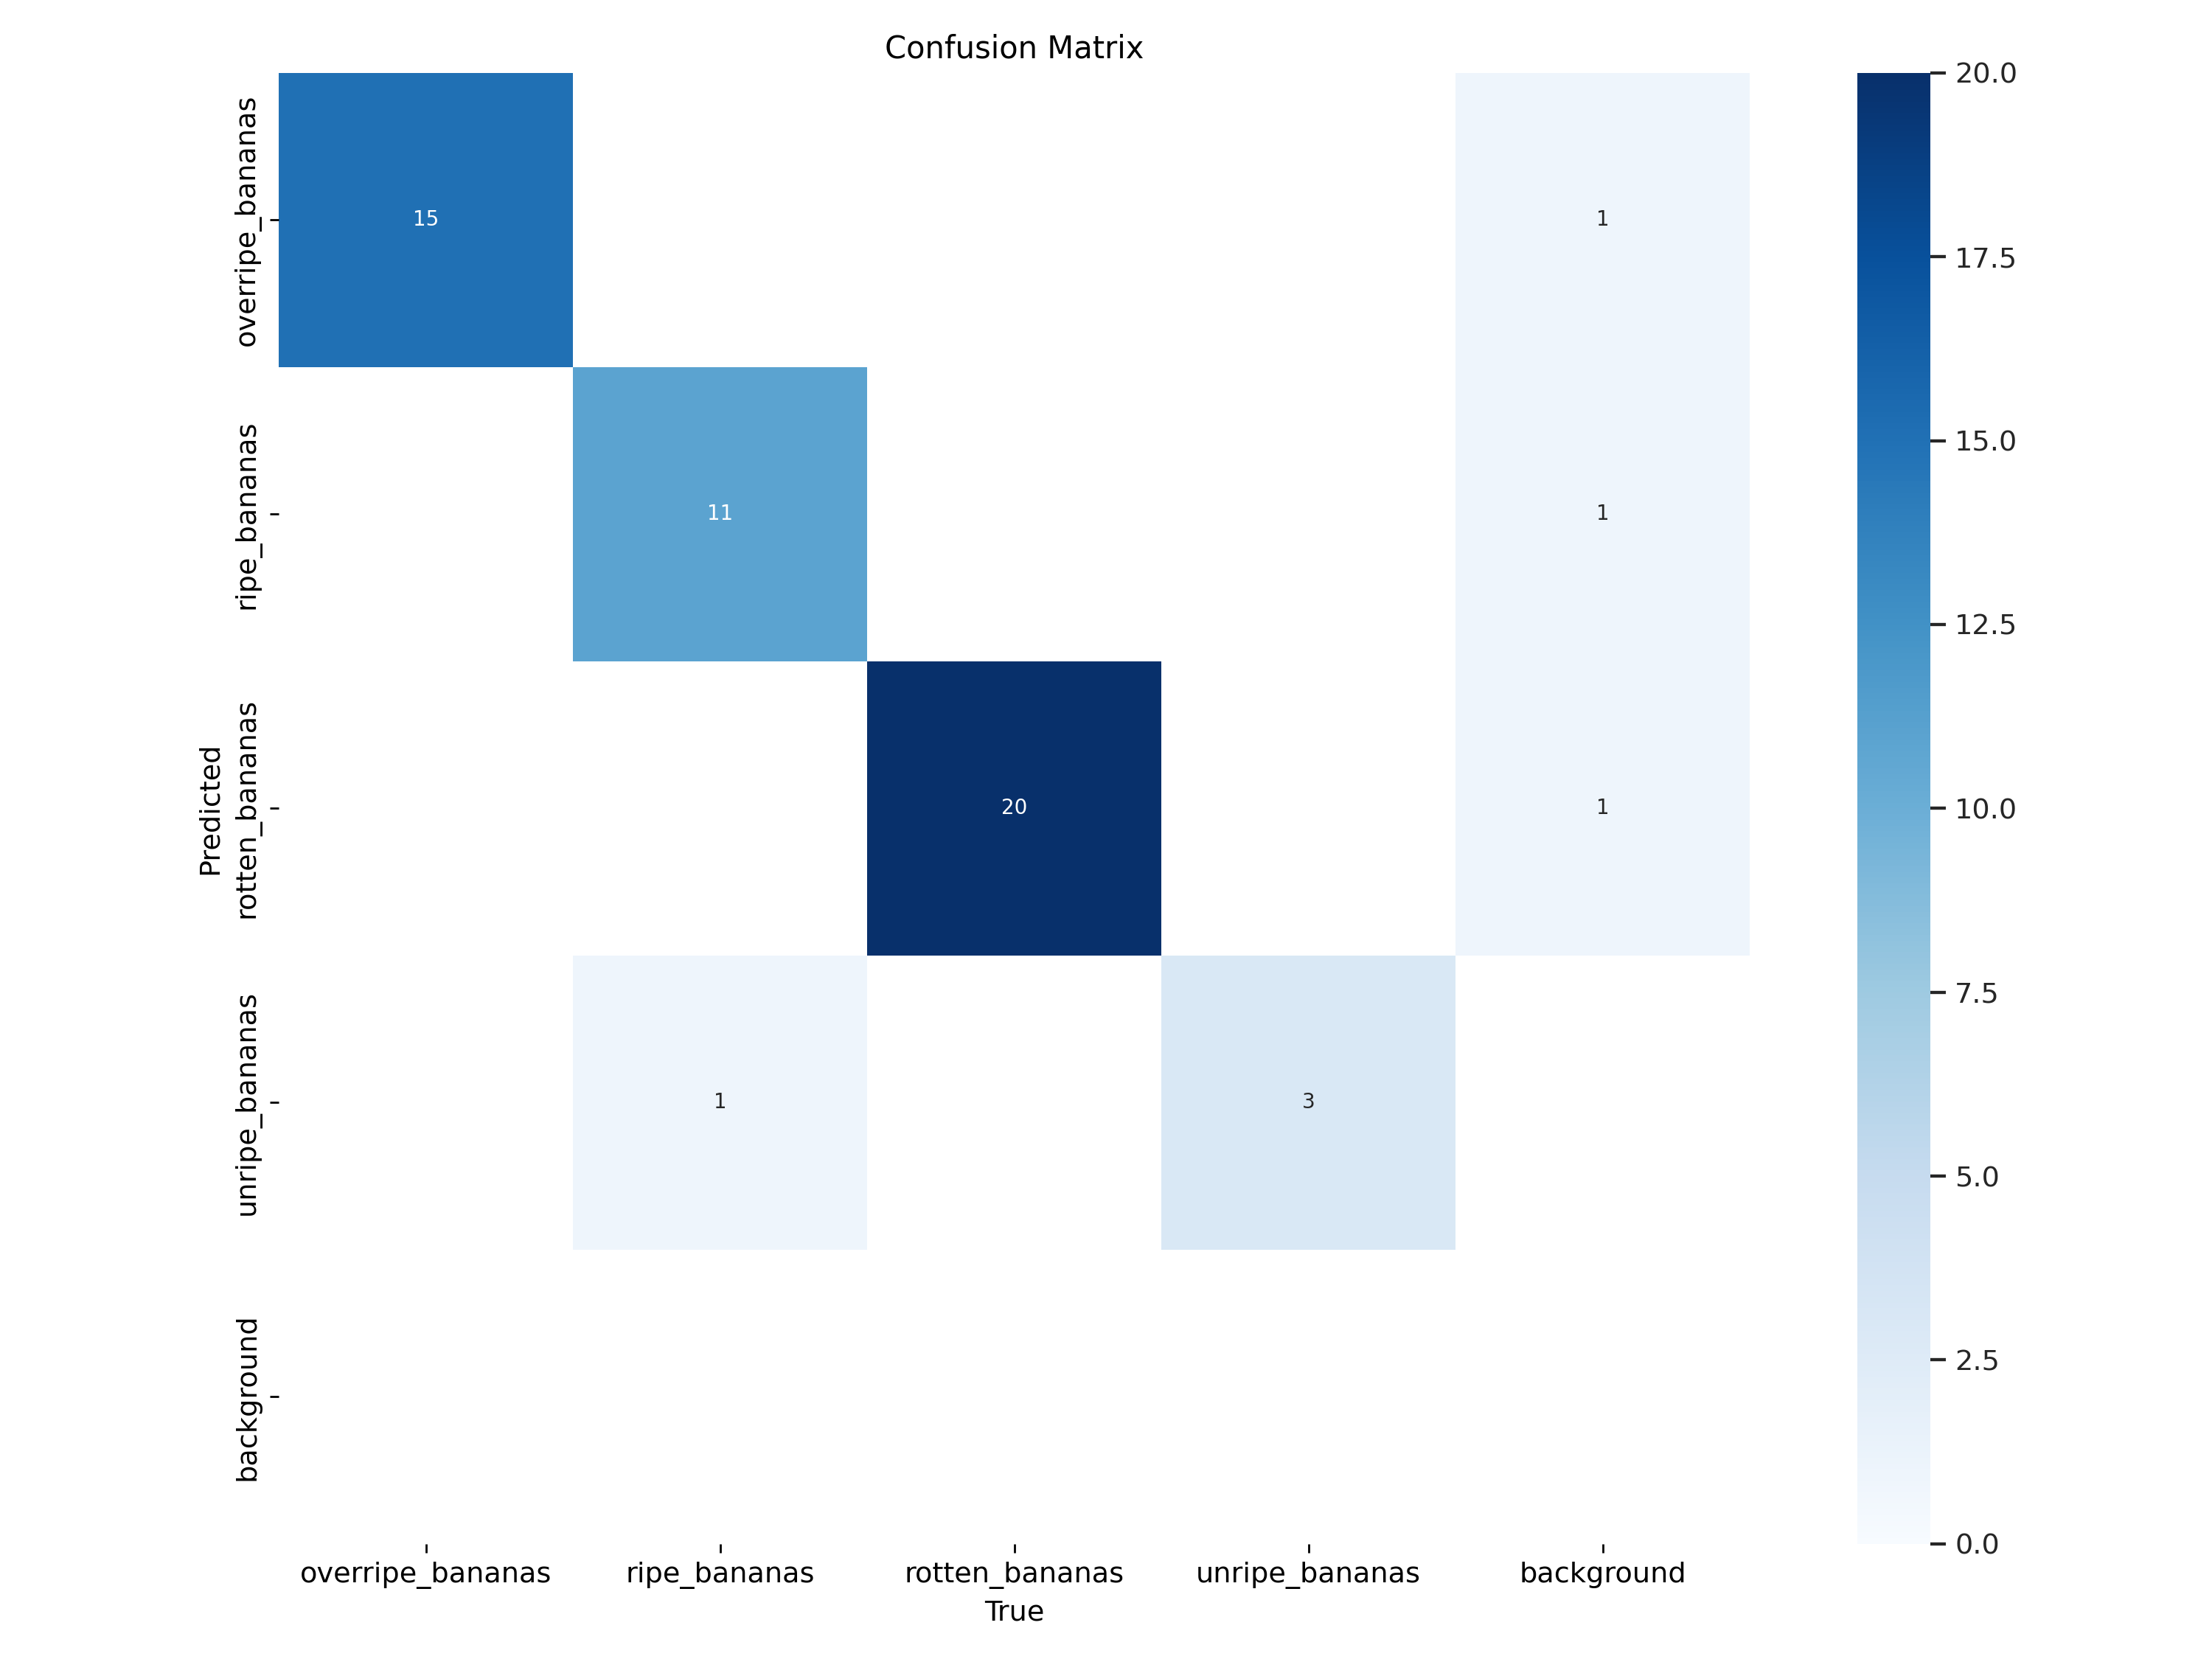

In [ ]:
from IPython.display import Image
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

# 8. Checking the Loss and mAP charts

/content/drive/MyDrive/video_detection/video_objdet_banana


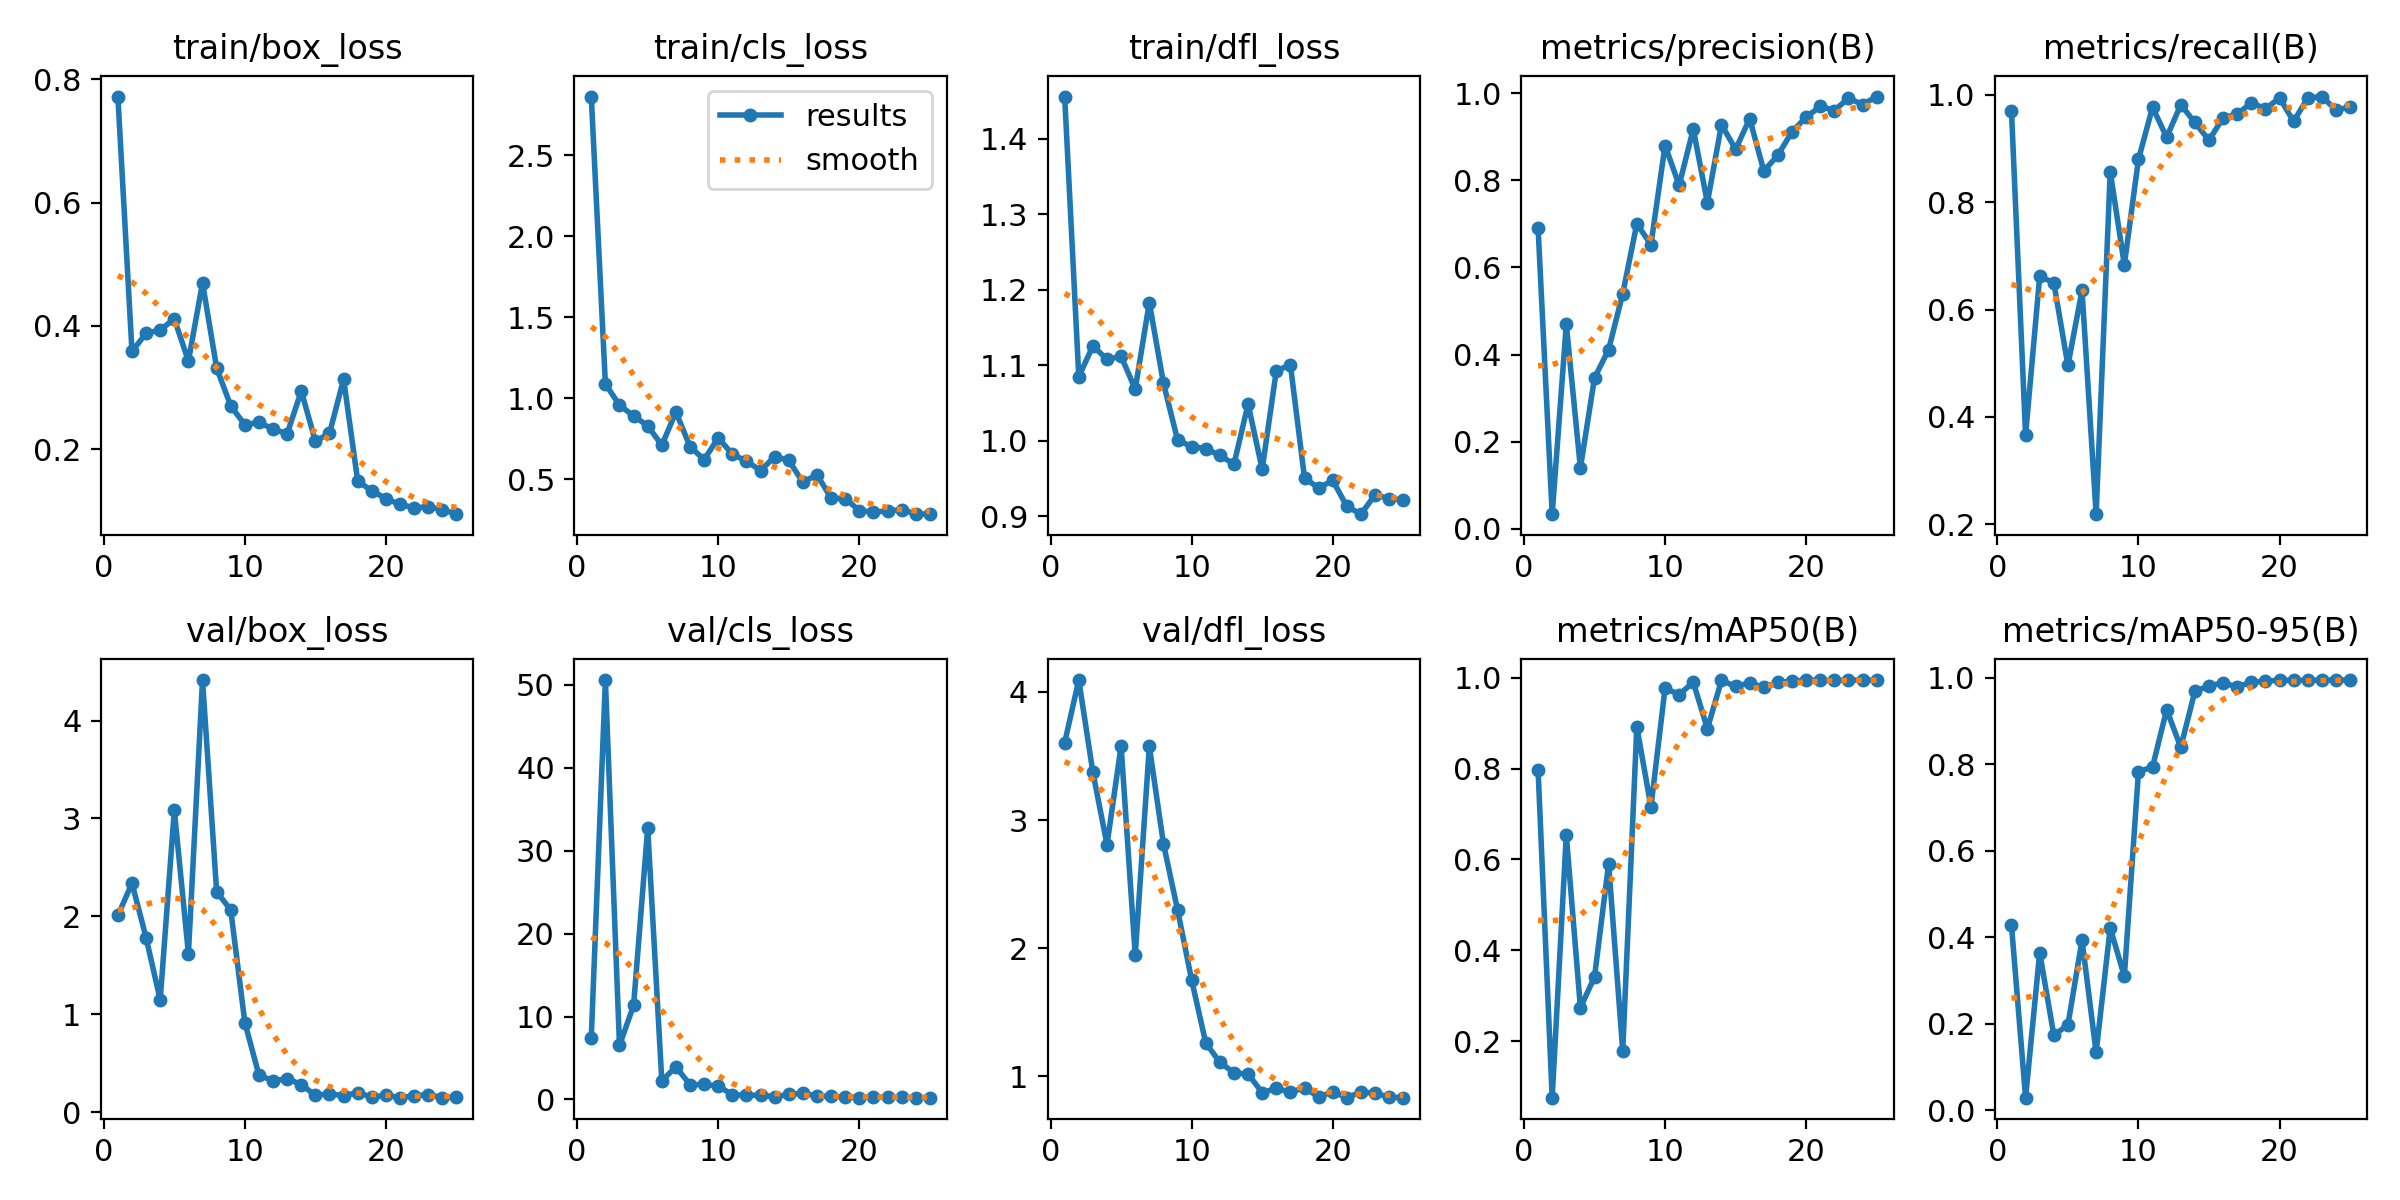

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

# 9. Checking the model predictions in the first validation batch

/content/drive/MyDrive/video_detection/video_objdet_banana


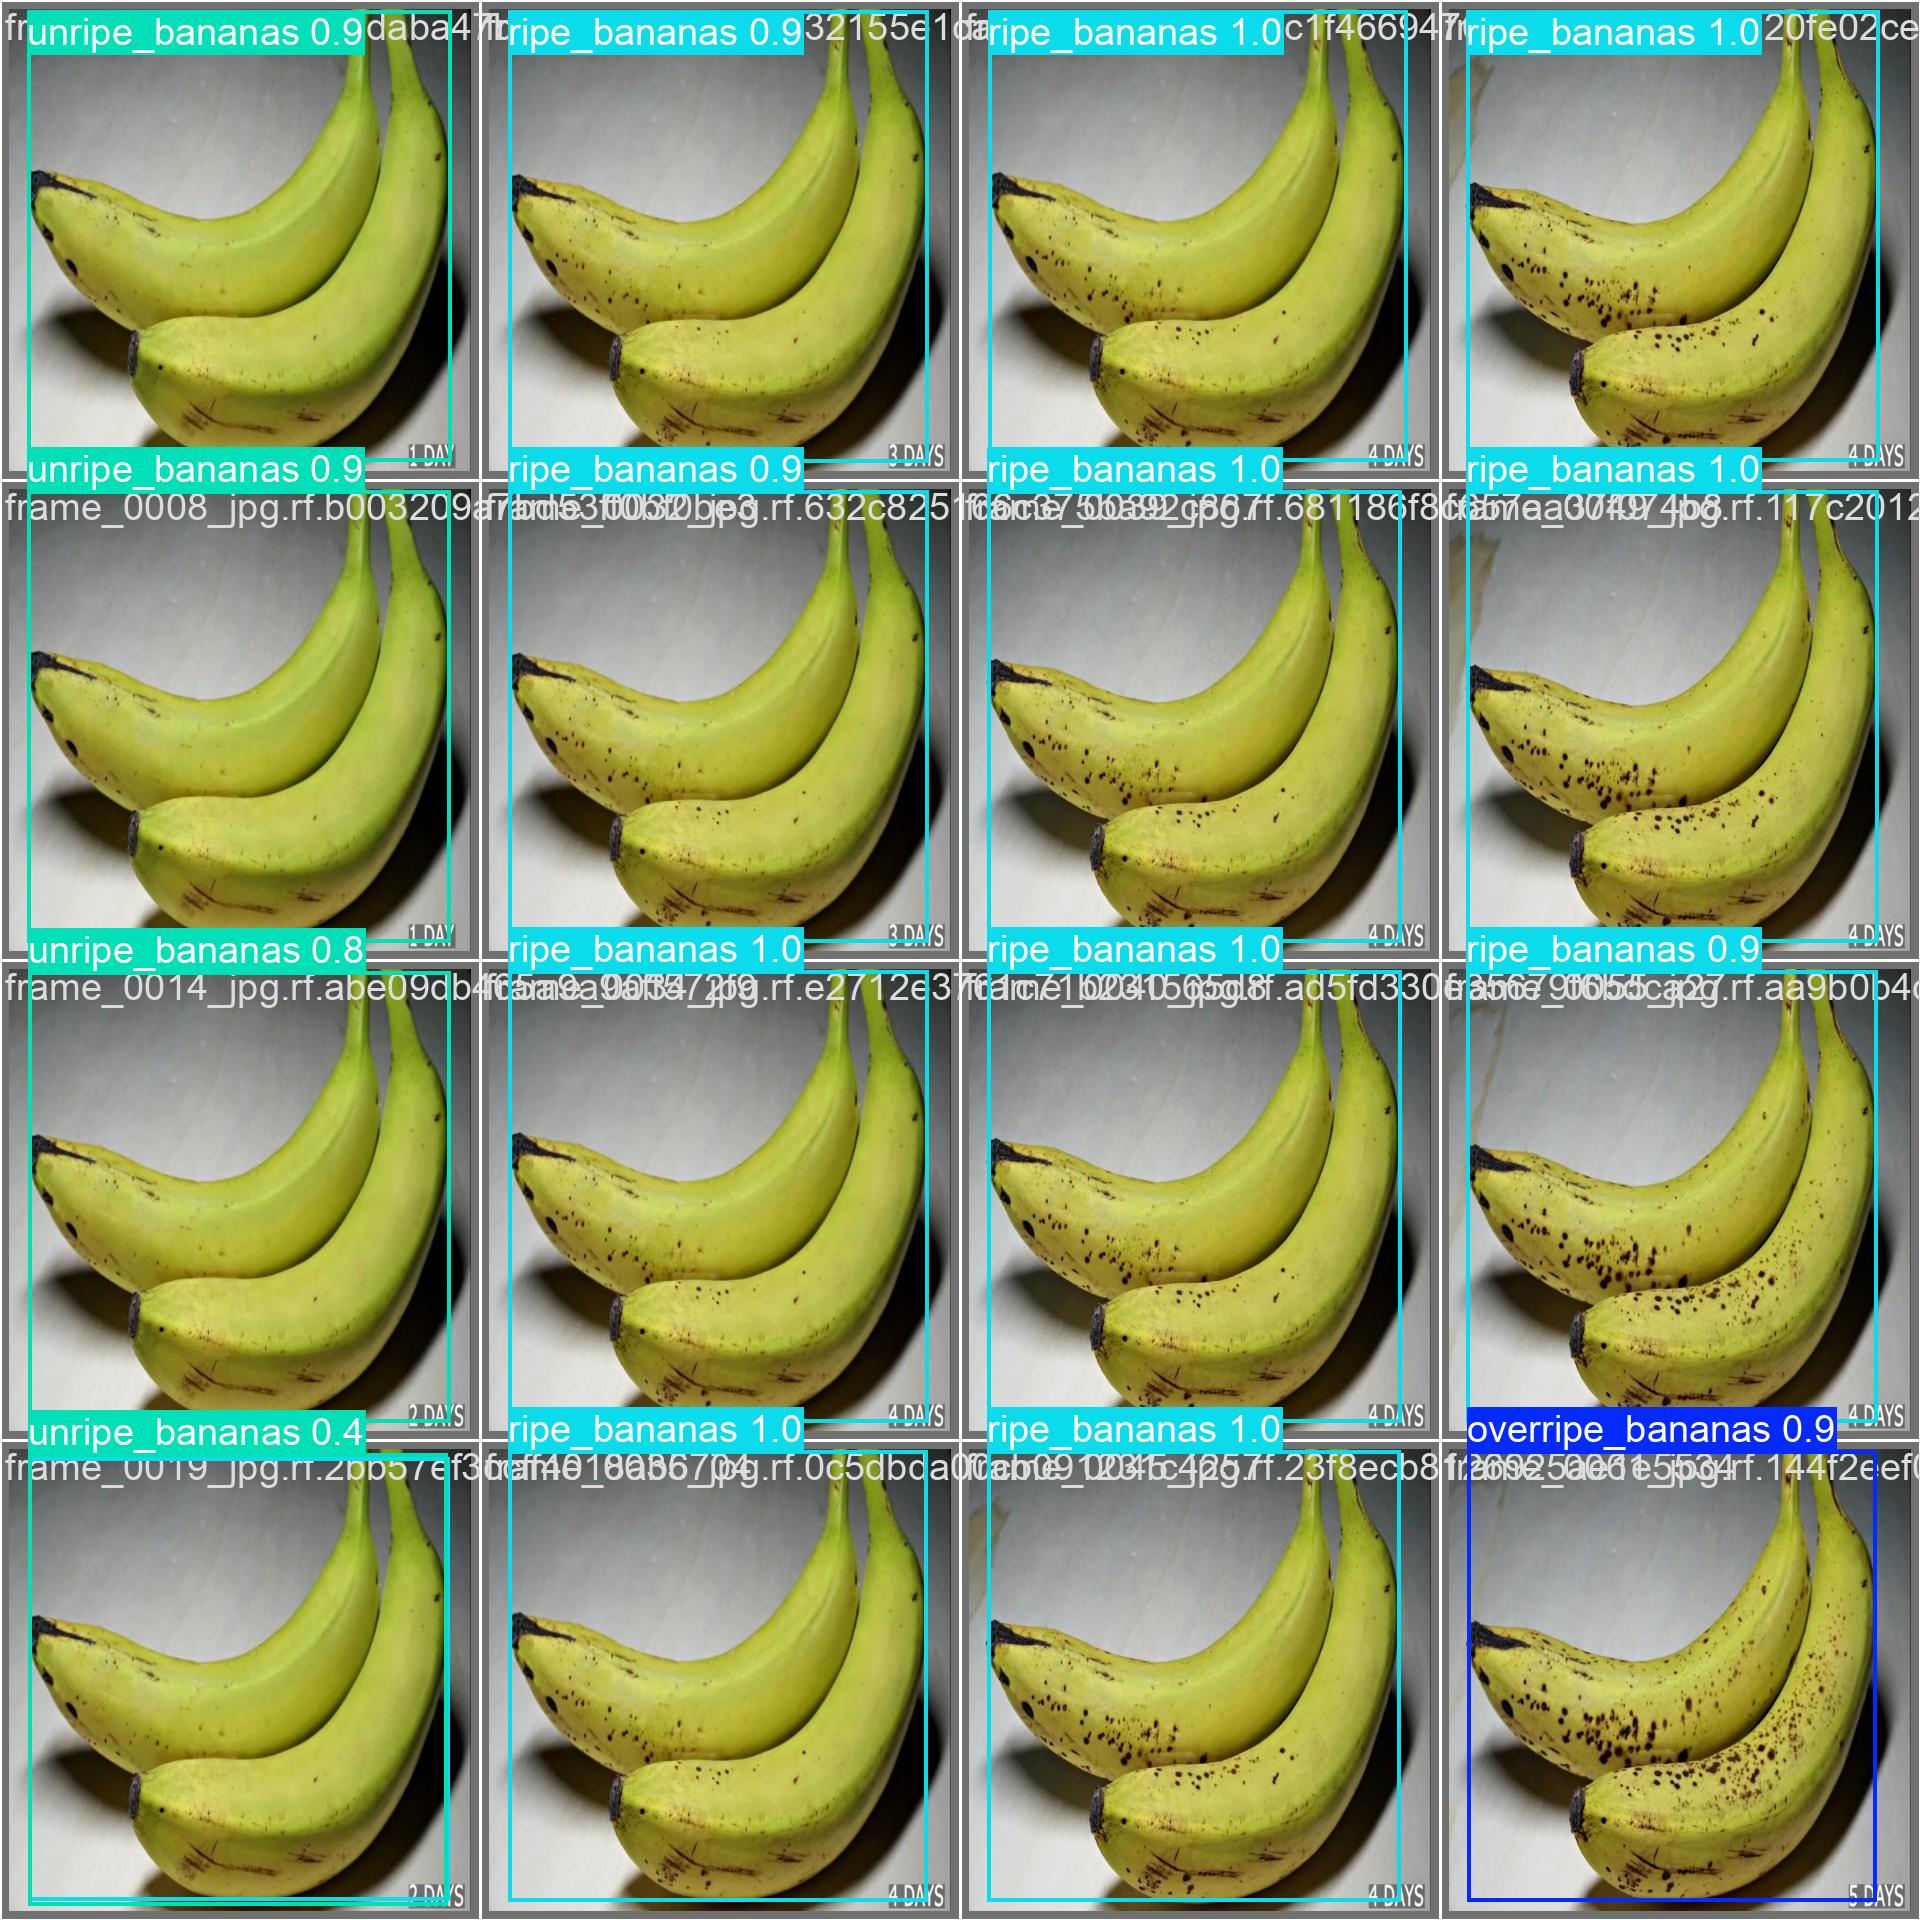

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

# 10. Model Validation

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model="{HOME}/runs/detect/train/weights/best.pt" data="{dataset.location}/data.yaml"

/content/drive/MyDrive/video_detection/video_objdet_banana
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/video_detection/video_objdet_banana/Banana_Video_Detection-1/valid/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100% 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:03<00:00,  1.33it/s]
                   all         50         50      0.992      0.977      0.995      0.995
      overripe_bananas         15         15          1      0.985      0.995      0.995
          ripe_bananas         12         12          1      0.955      0.995      0.995
        rotten_bananas         20         20          1      0.967      0.995      0.995
        unripe_bananas          3          3       0.97          1      0.995      0.995
Speed: 7.8ms pre

# 11. Model Testing

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.7 imgsz=800 source="{dataset.location}/test/images" save=True

/content/drive/MyDrive/video_detection/video_objdet_banana
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs

image 1/30 /content/drive/MyDrive/video_detection/video_objdet_banana/Banana_Video_Detection-1/test/images/frame_0000_jpg.rf.c5c35c7ee004c926c420eb3331ad3dfd.jpg: 800x800 1 unripe_bananas, 56.1ms
image 2/30 /content/drive/MyDrive/video_detection/video_objdet_banana/Banana_Video_Detection-1/test/images/frame_0003_jpg.rf.ed744a8a270b7f946f5e56b38fe33157.jpg: 800x800 1 unripe_bananas, 45.5ms
image 3/30 /content/drive/MyDrive/video_detection/video_objdet_banana/Banana_Video_Detection-1/test/images/frame_0005_jpg.rf.99240777896fb7cb84e3aa1b73daa3e2.jpg: 800x800 1 unripe_bananas, 45.5ms
image 4/30 /content/drive/MyDrive/video_detection/video_objdet_banana/Banana_Video_Detection-1/test/images/frame_0006_jpg.rf.ffc83fbb6eaa07c8643d0a158e5f51ea.jpg: 800x800 1 unripe_b

# 12. Prediction Result Visualization

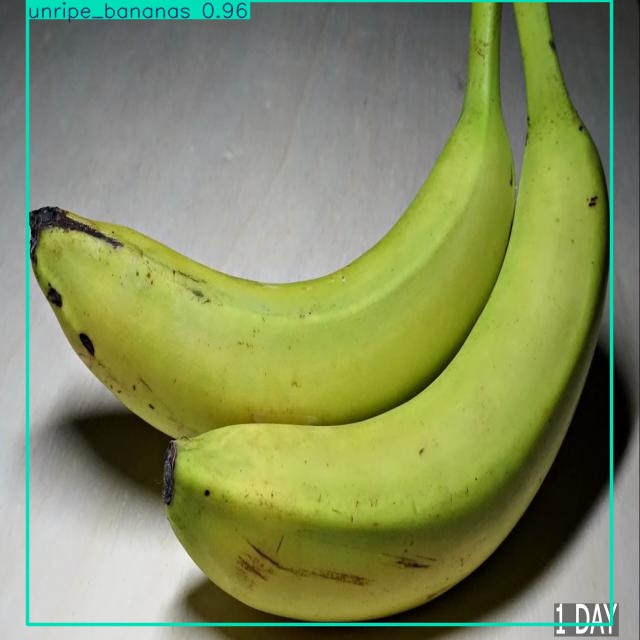

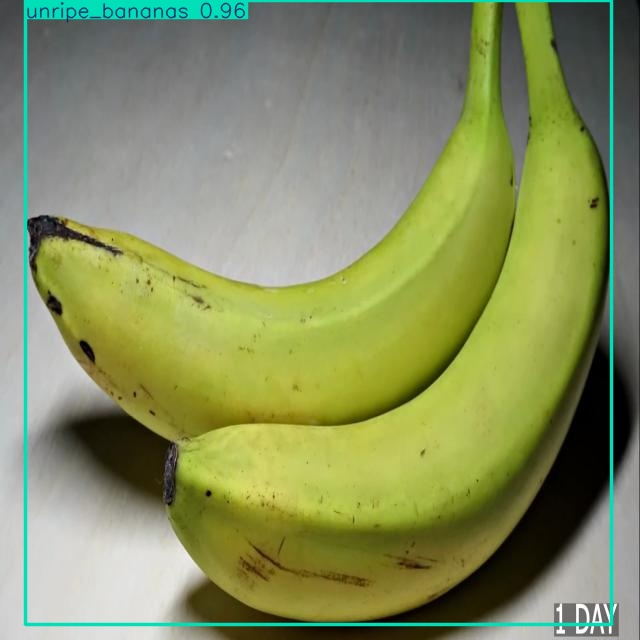

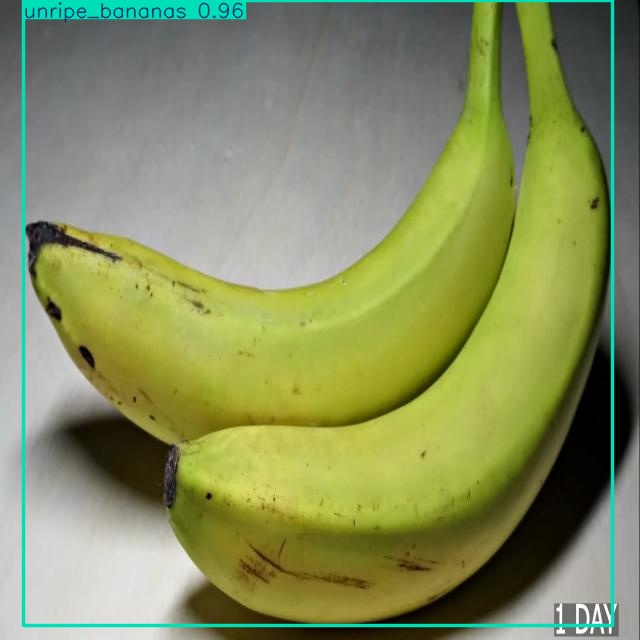

In [ ]:
import os
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = os.path.join(HOME, "runs", "detect")

# Pastikan foldernya ada dulu
if os.path.exists(base_path):
    # List all directories that start with 'predict' in the base path
    subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
                  if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

    if subfolders:
        # Find the latest folder by modification time
        latest_folder = max(subfolders, key=os.path.getmtime)

        image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

        # Display each image
        for image_path in image_paths:
            display(Image(filename=image_path, width=600))
            print("\n")
    else:
        print("Tidak ada folder 'predict*' ditemukan.")
else:
    print(f"Path tidak ditemukan: {base_path}")


# 13. Video Object Detection

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source="{dataset.location}/test/video/Banana_Timelapse.mp4" save=True

Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (frame 1/3151) /content/drive/MyDrive/video_detection/video_objdet_banana/Banana_Video_Detection-1/test/video/Banana_Timelapse.mp4: 480x800 2 unripe_bananass, 46.9ms
video 1/1 (frame 2/3151) /content/drive/MyDrive/video_detection/video_objdet_banana/Banana_Video_Detection-1/test/video/Banana_Timelapse.mp4: 480x800 2 unripe_bananass, 31.8ms
video 1/1 (frame 3/3151) /content/drive/MyDrive/video_detection/video_objdet_banana/Banana_Video_Detection-1/test/video/Banana_Timelapse.mp4: 480x800 2 unripe_bananass, 31.8ms
video 1/1 (frame 4/3151) /content/drive/MyDrive/video_detection/video_objdet_banana/Banana_Video_Detection-1/test/video/Banana_Timelapse.mp4: 480x800 2 unripe_bananass, 31.8ms
video 1/1 (frame 5/3151) /content/drive/MyDrive/video_detection/video_objdet_banana/Banana_Video_Detection-1/test/video/Bana